# Project Title:Data Science Salaries 2020-2023:EDA & Predictions

              Analyzing the Evolution of Data Science: A Comprehensive Study on its Transformative Journey in Recent Years



# Indroduction

            In the modern era, data science has emerged as a pivotal field driving innovation, decision-making, and progress across various industries. With the exponential growth of data generation and technological advancements, the landscape of data science has undergone a transformative journey in recent years. This project aims to delve into the evolution of data science, offering a comprehensive study that examines its transformative journey, key milestones, and emerging trends.

# 1.1  About Dataset
        This dataset aims to shed light on the salary trends in the field of Data Science for the years 2020 to 2023. With a focus on various aspects of employment, including work experience, job titles, and company locations, this dataset provides valuable insights into salary distributions within the industry.

#  2 Objectives
    1)Data preprocessing
    2)Practice using libraries to visualize data
    3)Visualize data, provide explanations about the correlation between attributes

# 3 IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 4 DATA EXPLORATORY
4.1  Load Dataset 

In [3]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# 4.2  Some Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# 4.3  Statistic

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# 4.4  Check Columns

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# 4.5  Check Missing Values

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No duplicates nor missing data.
The data consists mainly of categorical features and continuous features, with a lack of binary features.

# 4.5  Replace values in dataset

In [9]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

In [10]:
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [11]:
#Replace values in Company size column
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

In [12]:
#show the dataset top row result
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500,US,100,US,Small
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,Medium


# 5 Data Science Salary Trends (2020-2023):

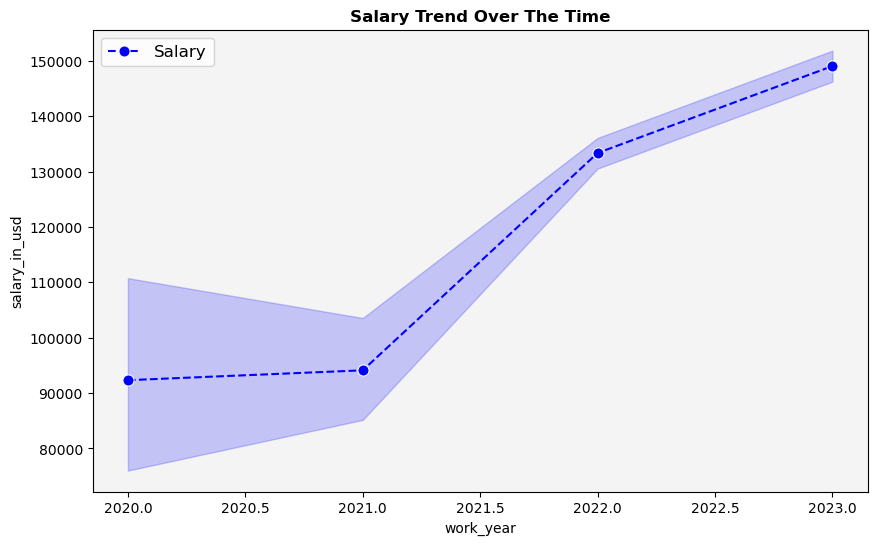

In [13]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

# Graph Interpretation:
    1)There wasn't much change in salary from 2020 to 2021.
    2)Continual changes occurred in salary from 2021 to 2022.
    3)The progress in salary from 2022 to 2023 followed a similar pattern.



# 6 Salary Trend Over Time by Company Size:

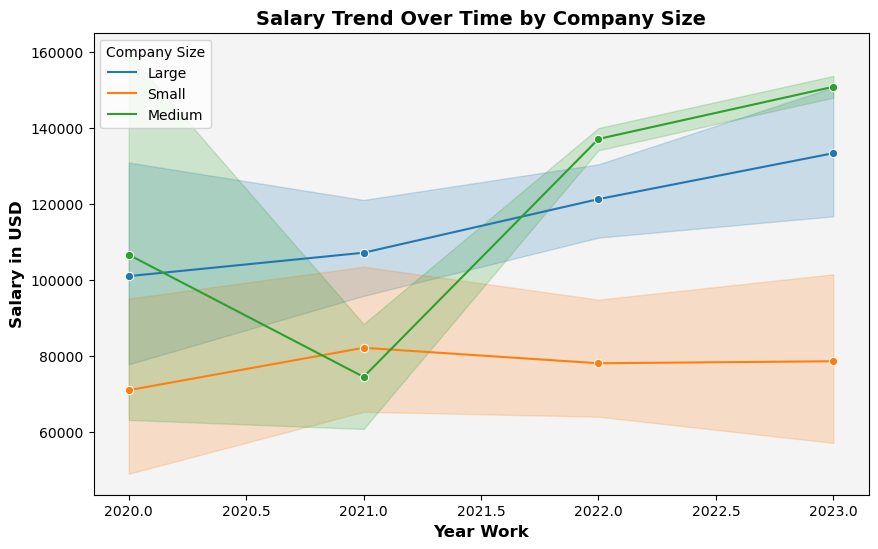

In [14]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

# Graph Interpretation:
    1)The salary trend in medium-sized companies is increasing compared to small and large companies.
    2)The salary line in large companies is not fluctuating as much as in medium-sized companies.


# 7 Average Salary by Experience Level:

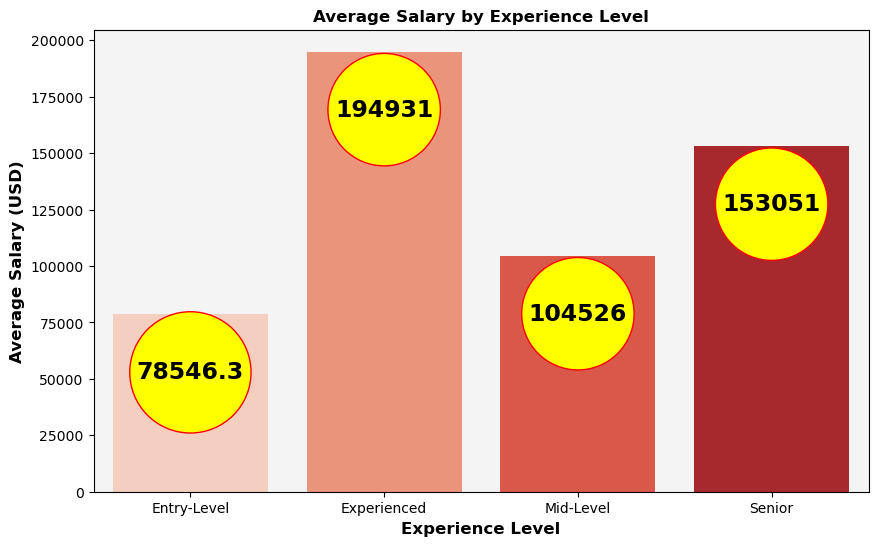

In [15]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

# Graph interpretation:
    1)Experienced professionals earn the highest average salary at approximately 194,931 USD.
    2)Seniors also receive a competitive average salary of about 153,062 USD.
    3)Mid-Level employees have an average salary of around 104,545 USD.
    4)Entry-Level positions offer a lower average salary, at approximately 78,546 USD.


# 8 Average Salary by Employment Type:

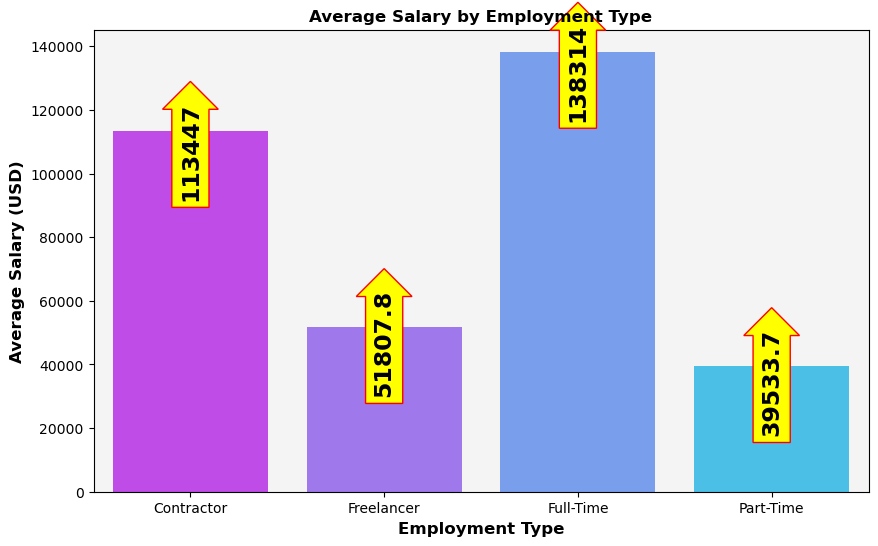

In [16]:
#Group data by 'employment_type' and calculate the average salary for each type
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'cool_r')
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                bbox = {'boxstyle': 'rarrow', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                rotation = 90
                      
                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()

# Graph interpretation:
    1)Full-Time employees have the highest average salary at approximately 138,298 USD.
    2)Contractors also earn a competitive average salary of about 113,447 USD.
    3)Freelancers and Part-Time workers have lower average salaries, at around 51,808 USD and 39,534 USD.


# 9 Average Salary by Job Title (Top 10)

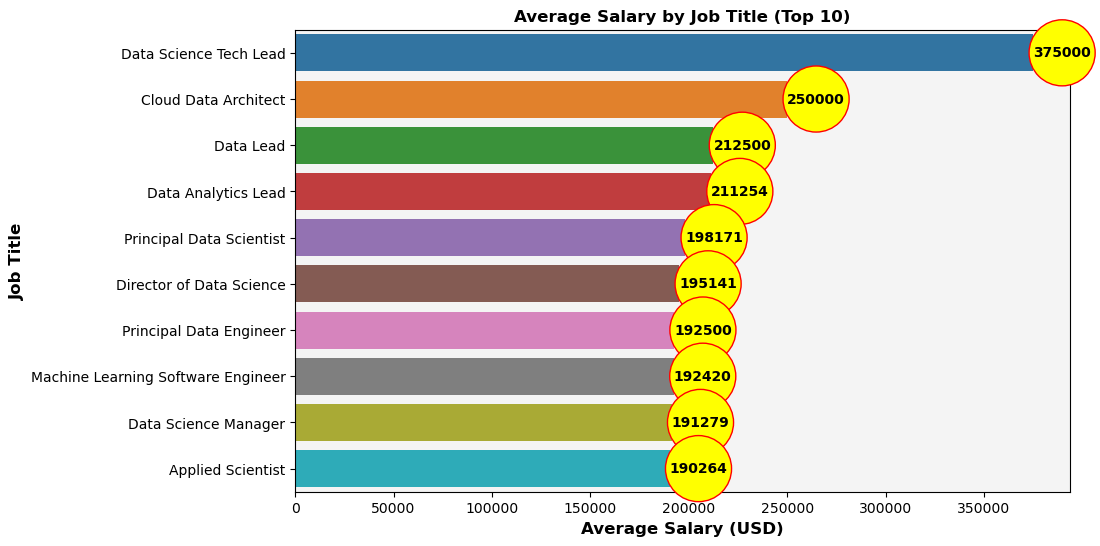

In [17]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold'
                
               
               )
# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

# Graph interpretation:
    1)Data Science Tech Lead has the highest average salary at 375,000 USD.
    2)Cloud Data Architect and Data Lead also have notably high salaries.
    3)The top 10 job titles exhibit strong earning potential in the data science field.


# 10 Average Salary by Currency:

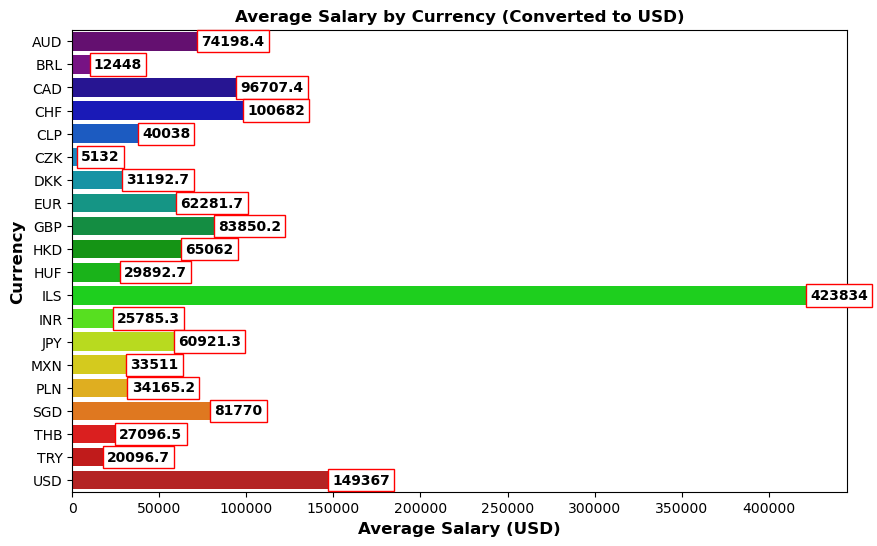

In [18]:
# Group data by 'salary_currency' and calculate the average salary in USD for each currency
currency_salary  = df.groupby('salary_currency')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(x = currency_salary.values , y  = currency_salary.index, palette = 'nipy_spectral')
plt.title('Average Salary by Currency (Converted to USD)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Currency', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container,
                bbox = {'boxstyle': 'square', 'facecolor': 'white', 'edgecolor': 'red'},
                fontweight = 'bold'
               
                
               )
# Customize the background color
plt.show()

# Graph interpretation:
    1)Employees receiving salaries in USD have the highest average salary at approximately 149,351 USD.
    2)Salaries in ILS (Israeli Shekel) are notably high, with an average of 423,834 USD.
    3)GBP (British Pound) and CHF (Swiss Franc) also offer competitive average salaries.
    4)Other currencies vary in average salaries, with AUD (Australian Dollar) and BRL (Brazilian Real) being among the lowest.


# 11 Average Data Science Salaries by Location:

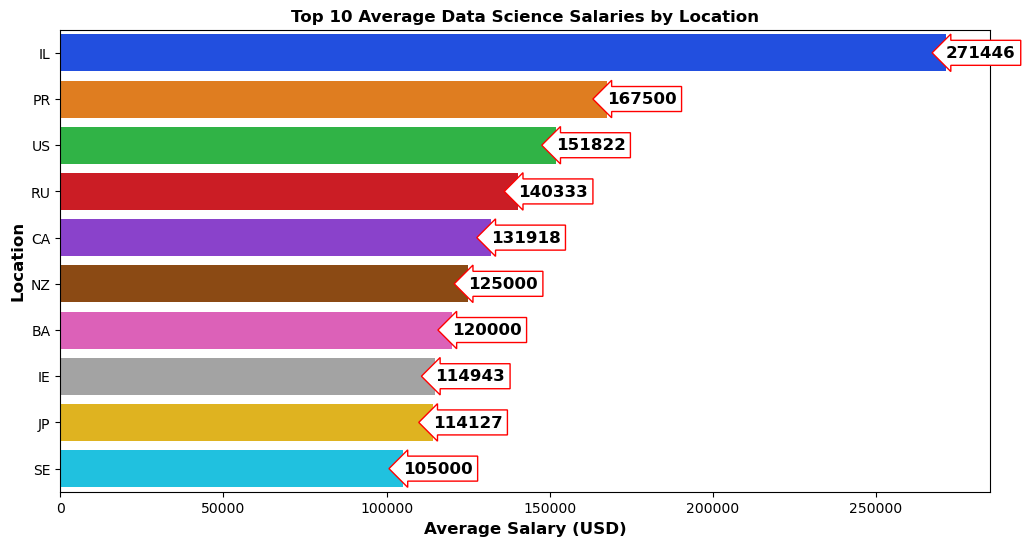

In [19]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
ax.set_facecolor("#f4f4f4")
plt.show()

# Graph interpretation:
    1)In Illinois (IL), the average data science salary is notably high, at approximately 271,447 USD.
    2)Puerto Rico (PR) and the United States (US) also offer competitive average salaries, with approximately 167,500 USD 
                          and 151,801 USD, respectively.
    3)Russia (RU) and Canada (CA) have average data science salaries of around 140,333 USD and 131,918 USD, respectively.
    4)New Zealand (NZ), Bosnia and Herzegovina (BA), Ireland (IE), Japan (JP), and Sweden (SE) round out the top locations 
                            with varying average salaries.


# 12 Average Salary by Company Size:

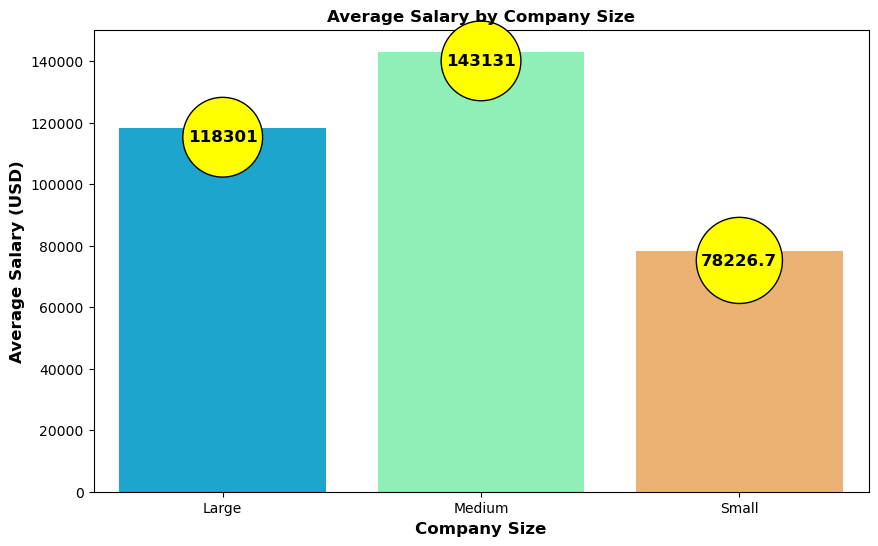

In [20]:
# Group data by 'company_size' and calculate the average salary for each size
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean()

# Plot the average salary by company size
plt.figure(figsize=(10, 6))
p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'rainbow')
plt.title('Average Salary by Company Size', fontsize=12, fontweight='bold')
plt.xlabel('Company Size',fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container, fontweight = 'bold',
                padding = -12,
                fontsize=12,
                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'black'}
                
               )


plt.show()

# Graph interpretation:
    1)Medium-sized companies offer the highest average salary at approximately 143,117 USD.
    2)Large companies follow with an average of about 118,306 USD.
    3)Small companies offer a lower average salary of around 78,227 USD.


# 13 Salary Distribution for Data Science Professionals:

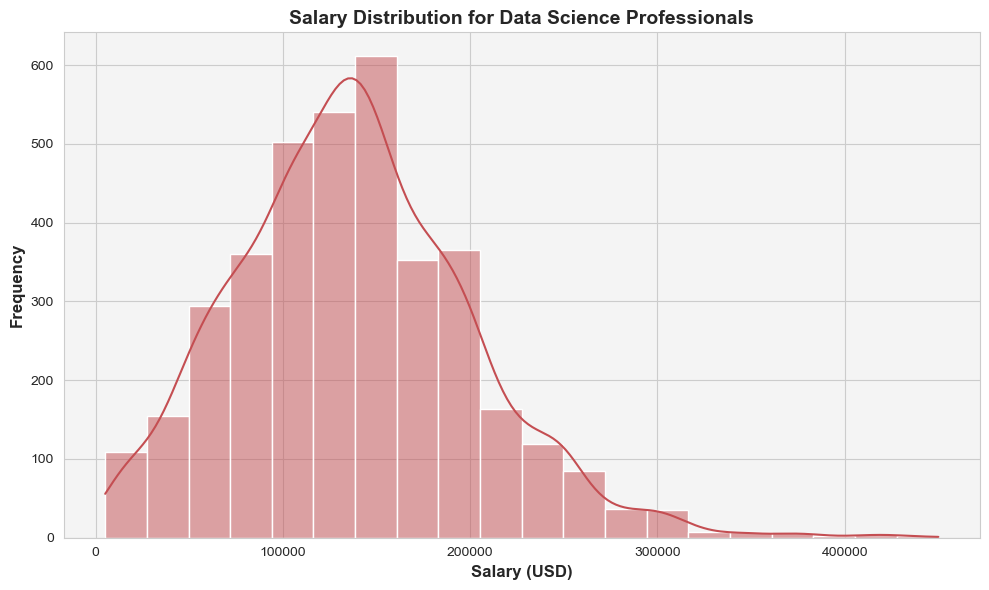

In [21]:
# Set a custom style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Show the plot
plt.tight_layout()
plt.show()

# Graph interpretation:
    1)The salary distribution for data science professionals is right-skewed, with a majority of professionals earning lower 
         to mid-range salaries.
    2)A noticeable peak in the distribution suggests a concentration of professionals within a specific salary range.
    3)The KDE (Kernel Density Estimate) curve provides a smooth estimate of the distribution, showing a prominent peak.


# 14 Job Title Recommendation:

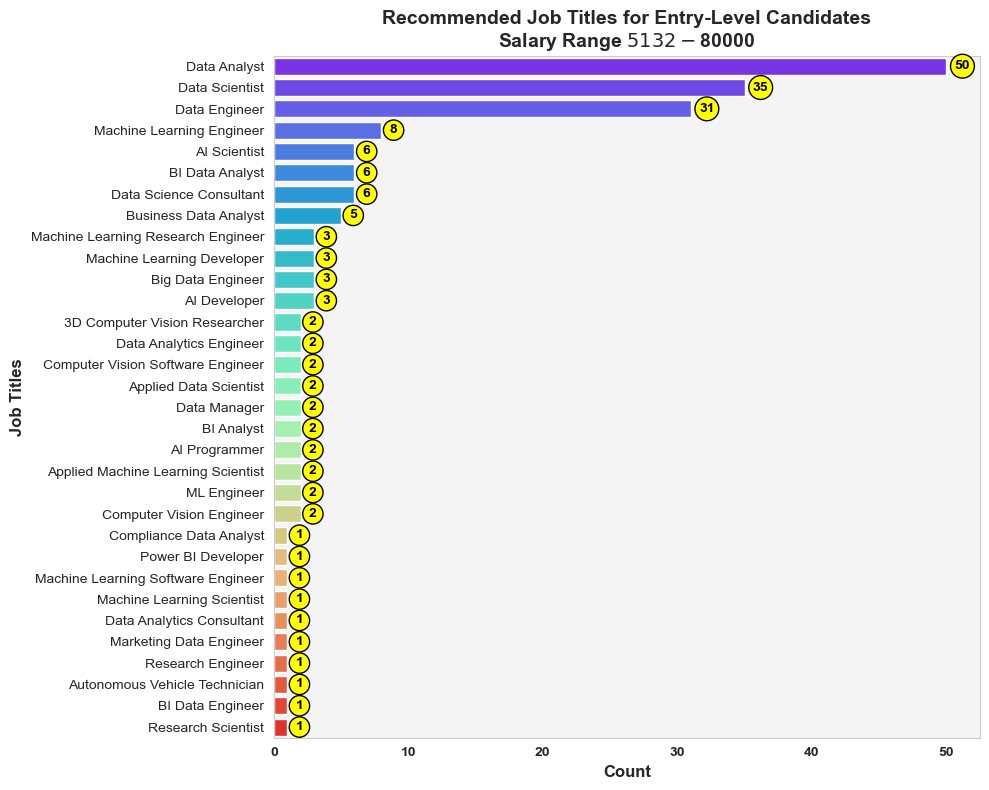

In [22]:


# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (5132, 80000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))



ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,
                 bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()



# Graph interpretation:
For Entry-Level candidates seeking a salary range between 5,132 to 80,000 USD, the top recommended job titles are:

    1)Data Analyst (50 job openings)
    2)Data Scientist (35 job openings)
    3)Data Engineer (31 job openings)


# 15 Average Salary by Experience Level and Employment Type:

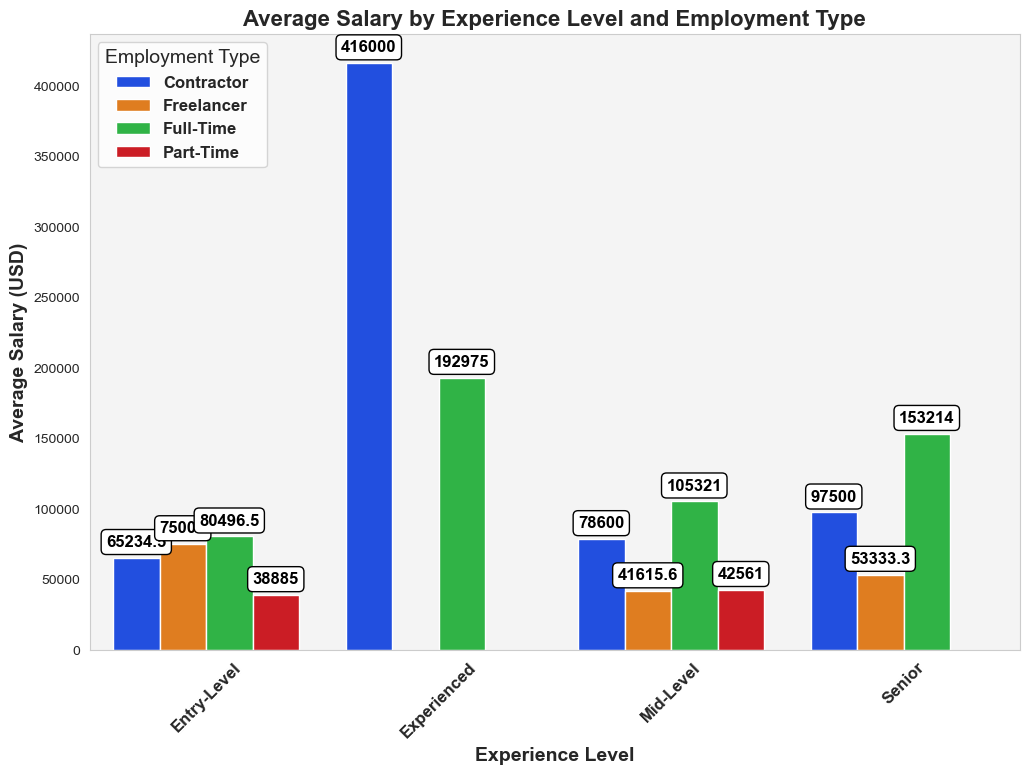

In [23]:


# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()



# Graph interpretation:
     Best Employment Type and Experience Level for Maximum Cost-Effectiveness:

    1)Experience Level: Experienced
    2)Employment Type: Contractor
    3)Average Salary (USD): 416,000.0


# 16 Average Salary by Company Location and Company Size:

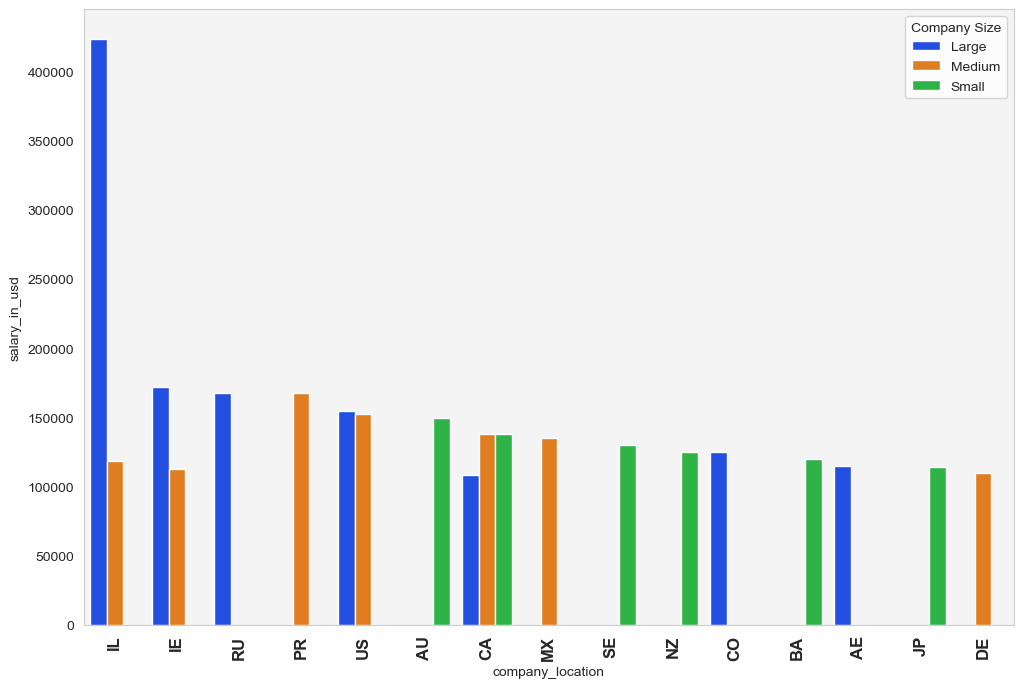

In [24]:
cost_effectiveness = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().reset_index().sort_values(by = 'salary_in_usd', ascending = False)[:20]

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='company_location', y='salary_in_usd', hue='company_size', data=cost_effectiveness)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')


lg = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')


# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()

# Graph interpretation:
              1)In Illinois (IL), large companies tend to offer an average salary of $423,834 USD, meeting cost-effectiveness criteria.

# 17 Count Plot for Experience Level and Employment Type etc:

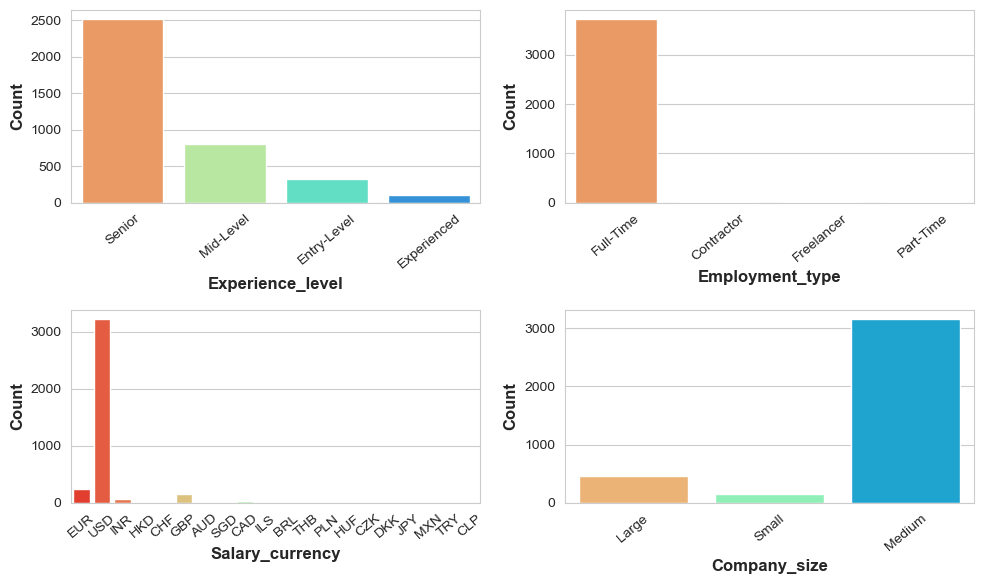

In [25]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

columns = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
axis = axis.flatten()
for i, col in enumerate(columns):
    p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)
    axis[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
    axis[i].set_ylabel('Count', fontsize=12, fontweight='bold')

# Remove any remaining empty subplots
for j in range(len(columns), len(axis)):
    fig.delaxes(axis[j])

    
plt.tight_layout()
plt.show()

# Graph interpretation:
    1)Most common experience level: "Senior" (2518 counts).
    2)Most common employment type: "Full-Time" (3724 counts).
    3)Majority of salaries in USD (3229 counts).
    4)Most prevalent company size: "Medium" (3157 counts).


# 18 Conclusion:

       1) Salary trends:

            1)Minimal change in 2020-2021.
            2)Continued fluctuations in 2021-2022.
            3)Similar pattern in 2022-2023.

       2) Company size impact:

            1)Medium companies see salary growth.
            2)Large companies have stable salaries.

       3) Experience level:

            1)Experienced pros earn most.
            2)Seniors follow, then mid-level, and entry-level.

       4) Employment types:

            1)Full-Time has the highest average.
            2)Contractors also earn well.
            3)Freelancers and part-timers earn less.

       5) Top job titles:

            1)Data Science Tech Lead earns the most.

       6) Currency-based salaries:

            1)USD salaries are highest.
            2)ILS, GBP, and CHF follow.

       7) Top locations:

            1)Illinois offers the highest salaries.

       8) Company size impact:

            Medium companies pay the most.

       9) Salary distribution:

            1)Right-skewed with a peak.

       10) Entry-level job titles:

            1)Data Analyst, Data Scientist, Data Engineer.

       11) Cost-effective choice:

            1)Experienced contractors earn 416,000 USD.

       12) Common insights:

            1)"Senior" is the most common experience level.
            2)"Full-Time" is the most common employment type.
            3)Majority earn salaries in "USD".
            4)"Medium" companies are prevalent.
